<span style="color:darkblue;font-size:32px;font-weight:bold">11752 - Aprendizaje Automático</span>

<span style="color:darkblue;font-size:32px;font-weight:bold">Práctica Bloque I - AirBnB</span>

<span style="color:darkblue;font-size:26px;font-weight:bold">Carlos Muñoz Ledesma</span>

El código podrá reproducirse con todos los archivos necesarios en el siguiente repositorio público de GitHub: **https://github.com/carlosmunozledesma/Aprendizaje_profundo**

<span style="font-size:26px;font-weight:bold">**Contenido**</span>

    1. Introducción
    2. Análisis de datos
    3. Tratamiento de los datos
    4. Modelo
    5. Conclusiones

# <span style="font-size:26px;font-weight:bold"> 1. Introducción</span>

El objetivo de esta práctica es el de determinar el precio de alquiler de un nuevo alojamiento de AirBnB en Mallorca. Concretamente se busca predecir el precio directamente a partir de las características del alojamiento. Para ello, se utilizarán algoritmos de aprendizaje automático supervisados como el modelo de regresión lineal o random forest, dependiendo de la disposición de los datos. El conjunto de datos viene dado por un documento resultado de un web scraping de la web AirBnB para los alojamientos en Mallorca.

# <span style="font-size:26px;font-weight:bold"> 2. Análisis de datos</span>

Para realizar cualquier tarea de aprendizaje automático, se ha de conocer el problema que se intenta resolver y los datos que se disponen. Por eso, para decidir de forma efectiva los algoritmos que se deberían utilizar, se hará un análisis previo a los datos. Este análisis de datos permite entender mejor el problema y obtener información de gran utilidad.

En esta sección se hará un estudio de los datos, las columnas necesarias para solucionar el problema, decidir el tipo de problema que se va a resolver (regresión o clasificación) y los modelos que se utilizarán para obtener una posible solución.

Para comenzar cargaremos todas las librerías que se utilizarán durante todo el proyecto, leeremos el conjunto de datos y visualizaremos la información de las columnas.

In [1]:
# Librerías que serán necesarias durante la práctica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
# Cargamos el conjunto de datos
df = pd.read_csv('airbnb.csv')

In [3]:
# Información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17608 entries, 0 to 17607
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17608 non-null  int64  
 1   listing_url                                   17608 non-null  object 
 2   scrape_id                                     17608 non-null  int64  
 3   last_scraped                                  17608 non-null  object 
 4   name                                          17607 non-null  object 
 5   description                                   17393 non-null  object 
 6   neighborhood_overview                         8213 non-null   object 
 7   picture_url                                   17608 non-null  object 
 8   host_id                                       17608 non-null  int64  
 9   host_url                                      17608 non-null 

Se puede observar una primera información estructural de los datos. Presenta 74 columnas, donde nuestra variable dependiente (target) es price, la cual hace referencia al precio del alojamiento. También se informa del número total de filas del dataset, las filas que no son nulas para cada característica y el tipo de datos, ya sea numérico o tipo objeto. Las características se dividen básicamente en características propias del alojamiento y características del usuario de ese anuncio.

Las características que interesan son las relacionadas con el alojamiento y a ser posible que sean numéricas para que los modelos las puedan tratar. Si alguna que no es numérica fuese interesante, se tendrá que tratar para que sea numérica. Por ejemplo, la variable dependiente que es el precio, es del tipo objeto y no es numérica. No quedará otra opción que convertirla a numérica para que los modelos de predicción funcionen. Además, la característica de precio será necesaria su transformación a numérico para poder realizar un análisis previo de los datos, ver sus estadísticas y correlaciones.

Por otro lado, no interesan los valores nulos, así que las filas nulas para algunas características tendrán que ser tratadas, ya sea con la media de los valores de esa característica, poniendo un 0 o simplemente eliminando la fila, por ejemplo. Podemos observar que hay varias columnas que son todo nulos pero concretamente *bathrooms* donde se utilizará la columna *bathrooms_text*, la cual sí contiene información sobre los baños que dispone ese alojamiento.

Tras observar la información de las columnas, se decide trabajar con las siguientes columnas:
<ul>
 <li>latitude: coordenada geográfica Y.</li>
 <li>longitude: coordenada geográfica X.</li>
 <li>room_type: tipo de la habitación que se alquila.</li>
 <li>accommodates: número de personas que se pueden acomodar.</li>
 <li>bathrooms_text: número de baños.</li>
 <li>bedrooms: número de habitaciones.</li>
 <li>beds: número de camas.</li>
 <li>price: el precio por noche.</li>
 </ul>
Para escoger las características solo será necesario fijarse en las que son propias del alojamiento que se alquila. Por eso, las características relacionadas con el usuario, serán descartadas totalmente. Cabe destacar que solo se han escogido las columnas que mejor caracterizan las propiedades de una casa a fin de obtener un precio a partir de esas características.

En cuanto a *neighbourhood* habría sido interesante pero con prácticamente la mitad de filas a null, son demasiadas y no es tan relevante teniendo la geolocalización.

Se ha obviado la columna *amenities* debido a su gran cantidad de información que podría desviar la atención de las características más importantes.

Referente a *property_type* y *room_type*, ofrecen casi la misma información siendo la primera más precisa con mayor número de características categóricas. Por eso se ha escogido la columna de *room_type* y se ha obviado la columna de *property_type* porque así se tiene una categorización menos extensa y posteriormete para pasarlo a numérico, no tendrá tantas columnas.

Se ha tenido que escoger *bathrooms_text* para obtener la información del número de baños. Tras su visualización del contenido y ver que *bathrooms* no tenía información pero *bathrooms_text*, sí, se ha escogido esta última con la necesidad de una transformación.

También, podemos observar que se indica el número de filas con valores distintos a nulos. Esto conlleva a tener que hacer una transformación de las filas que tengan elementos nulos a fin de que el estudio sea con datos cuantitativos y no con valores nulos.

Inmediatamente, procederemos a realizar un cambio menor pero totalmente necesario para el análisis de los datos. Se modifican las características de *bathrooms_text* y *price*, para que así se puedan estudiar junto al resto de características numéricas. Para ello se crearán 2 funciones.

In [4]:
# Cambiamos el tipo de la columna Precio a float
def tratarColumnaPrice():
    count = 0
    for e in df['price']:
        df['price'][count] = df['price'][count].replace('$','').replace(',','') # Quitamos los $ y las ,
        count= count+1
    df['price'] = pd.to_numeric(df['price'])
tratarColumnaPrice()

<ipython-input-4-94f54f4c9c01>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][count] = df['price'][count].replace('$','').replace(',','') # Quitamos los $ y las ,


Comprobamos que la característica *price* es realmente float.

In [5]:
df['price']

0         89.0
1        175.0
2        140.0
3        200.0
4        110.0
         ...  
17603    195.0
17604    110.0
17605    179.0
17606     42.0
17607    100.0
Name: price, Length: 17608, dtype: float64

Ahora tratamos la columna de *bathrooms_text*, la cual tiene normalmente el número de baños seguido de la palabra bath/baths y alguna excepción como *Shared*, *Half-bath* o *Private*. Para los nan se le ha dado el valor 0.

In [6]:
# Cambiamos el tipo de la columna Bathrooms_text a float
def tratarColumnaBathrooms_text():
    count = 0
    for e in df['bathrooms_text']:
        if(str(df['bathrooms_text'][count]).split()[0] == 'Shared'):
            df['bathrooms_text'][count] = 0.5
        if(str(df['bathrooms_text'][count]).split()[0] == 'Half-bath'):
            df['bathrooms_text'][count] = 0.5
        if(str(df['bathrooms_text'][count]).split()[0] == 'nan'):
            df['bathrooms_text'][count] =  0
        if(str(df['bathrooms_text'][count]).split()[0] == 'Private'):
            df['bathrooms_text'][count] = 1
        df['bathrooms_text'][count] = str(df['bathrooms_text'][count]).split()[0] # Nos quedamos con la primera parte que es la numérica
        count= count+1
    df['bathrooms_text'] = pd.to_numeric(df['bathrooms_text'])
tratarColumnaBathrooms_text()

<ipython-input-6-c04085b6dd93>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms_text'][count] = str(df['bathrooms_text'][count]).split()[0] # Nos quedamos con la primera parte que es la numérica
<ipython-input-6-c04085b6dd93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms_text'][count] = 0.5
<ipython-input-6-c04085b6dd93>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms_text'][count] =  0
<

Comprobamos que la columna es numérica.

In [7]:
df['bathrooms_text']

0        1.0
1        3.0
2        2.0
3        1.0
4        1.0
        ... 
17603    3.5
17604    3.0
17605    2.0
17606    1.0
17607    2.0
Name: bathrooms_text, Length: 17608, dtype: float64

A continuación veremos unos valores estadísticos relacionados con las características numéricas, que permitirán tener información del comportamiento de los datos. Podremos ver el total de filas, la media aritmética, la desviación estándar, el valor mínimo, máximo y los percentiles.

In [8]:
df_statistics_first = pd.DataFrame(df, columns=['latitude','longitude','accommodates','bathrooms_text','bedrooms','beds','price'])
df_statistics_first.describe()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price
count,17608.000000,17608.000000,17608.000000,17608.000000,17333.000000,17511.000000,17608.000000
mean,39.657597,2.994115,5.857962,2.289016,2.952980,4.357147,244.383561
std,0.165577,0.246129,2.727737,1.363155,1.520433,2.561838,409.958169
min,39.301970,2.346500,0.000000,0.000000,1.000000,0.000000,0.000000
25%,39.543433,2.796892,4.000000,1.000000,2.000000,3.000000,110.000000
50%,39.670285,3.047310,6.000000,2.000000,3.000000,4.000000,179.000000
75%,39.797413,3.145215,8.000000,3.000000,4.000000,6.000000,275.000000
max,39.930650,3.475520,16.000000,32.000000,40.000000,50.000000,20736.000000


Como el objetivo es predecir el precio de un alojamiento, es importante prestar atención en la característica *price*. Se observa que no tiene ningún nulo y que la mayoría de sus valores están entre 0 y 275 aproximadamente. Cabe comentar que no tiene sentido que el precio de un alojamiento sea 0. También el máximo dista mucho de los valores normales de un alojamiento y se puede observar el outlayer del precio máximo.

El recuento de columnas, tanto en *bedrooms* como en *beds* es menor al total de columnas y esto es debido a que existen valores nulos. También se puede observar que en estas 2 columnas el máximo, teniendo en cuenta los valores de los percentiles, es un outlier y que dista mucho de la media, tanto de *bedrooms* como de *beds*. También es algo raro que el valor mínimo en *beds* sea 0 al igual que ocurre con *accommodates*, no tiene mucho sentido. El resto de características parecen tener unos valores lógicos acordes a su característica.

**Tratamiento de Outliers**

Por los valores estadísticos vistos anteriormente, se pueden observar *outliers* y por eso conviene eliminarlos. Se pueden observar como el mínimo en *beds* y *price* es 0 y el máximo en *bathrooms_texts*, *bedrooms*, *beds* y *price*, supera  de mucho el cuarto percentil. Por eso se procederá a eliminar los *outliers*. Se decide, del 100% de  los datos, quitar el  primer 1% cuantil y el 5% final. De esta forma nos quedamos con los valores del 1% hasta el 95% cuantil.

In [9]:
# Outliers de price
y_price = df['price']
# Calculamos el rango cuantil
removed_outliers = y_price.between(y_price.quantile(.01), y_price.quantile(.95))
# Obtenemos los indices a remover
index_names = df[~removed_outliers].index

print(index_names)

Int64Index([    9,    21,   101,   134,   145,   163,   171,   173,   229,
              255,
            ...
            17373, 17440, 17484, 17496, 17547, 17569, 17570, 17572, 17574,
            17584],
           dtype='int64', length=1050)


In [10]:
# Borramos los índices que se quieren remover
df = df.drop(index_names)

In [11]:
#Visualizamos nuevamente la información de la tabla
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16558 entries, 0 to 17607
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16558 non-null  int64  
 1   listing_url                                   16558 non-null  object 
 2   scrape_id                                     16558 non-null  int64  
 3   last_scraped                                  16558 non-null  object 
 4   name                                          16557 non-null  object 
 5   description                                   16400 non-null  object 
 6   neighborhood_overview                         7742 non-null   object 
 7   picture_url                                   16558 non-null  object 
 8   host_id                                       16558 non-null  int64  
 9   host_url                                      16558 non-null 

 Vemos que el total de filas ha bajado en 1050 filas y al eliminar los outliers, un 1%, quedándonos con el rango de 1% a 95% cuantil de los datos.

Ahora realizaremos lo mismo para quitar los *outliers* en las columnas de *beds*, *bedrooms* y *bathrooms_text* con un 2% a 99.9% cuantil, 0% a 99.9% cuantil y 1% a 99.9% cuantil, respectivamente.

In [12]:
# Outliers de beds
y_beds = df['beds']

# Calculamos el rango cuantil
removed_outliers = y_beds.between(y_beds.quantile(.02), y_beds.quantile(.999))

# Obtenemos los indices a remover
index_names = df[~removed_outliers].index

# Borramos los índices que se quieren remover
df = df.drop(index_names)

In [13]:
# Outliers de bedrooms
y_bedrooms = df['bedrooms']

# Calculamos el rango cuantil
removed_outliers = y_bedrooms.between(y_bedrooms.quantile(.0), y_bedrooms.quantile(.999))

# Obtenemos los indices a remover
index_names = df[~removed_outliers].index

# Borramos los índices que se quieren remover
df = df.drop(index_names)

In [14]:
# Outliers de bathrooms_text
y_bathrooms_text = df['bathrooms_text']

# Calculamos el rango cuantil
removed_outliers = y_bathrooms_text.between(y_bathrooms_text.quantile(.01), y_bathrooms_text.quantile(.999))

# Obtenemos los indices a remover
index_names = df[~removed_outliers].index

# Borramos los índices que se quieren remover
df = df.drop(index_names)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15914 entries, 0 to 17607
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            15914 non-null  int64  
 1   listing_url                                   15914 non-null  object 
 2   scrape_id                                     15914 non-null  int64  
 3   last_scraped                                  15914 non-null  object 
 4   name                                          15913 non-null  object 
 5   description                                   15791 non-null  object 
 6   neighborhood_overview                         7424 non-null   object 
 7   picture_url                                   15914 non-null  object 
 8   host_id                                       15914 non-null  int64  
 9   host_url                                      15914 non-null 

Vemos como el número de filas ha disminuido por el tratamiento de *outliers*.

Ahora generaremos un data frame con las columnas numéricas que se utilizarán para resolver el problema.

In [16]:
df_statistics = pd.DataFrame(df, columns=['latitude','longitude','accommodates','bathrooms_text','bedrooms','beds','price'])
df_statistics.describe()

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price
count,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000,15914.000000
mean,39.660614,3.003735,5.750346,2.184586,2.854405,4.323677,198.025918
std,0.166952,0.238911,2.471494,1.106388,1.286068,2.198269,115.251200
min,39.301970,2.346500,1.000000,1.000000,1.000000,1.000000,26.000000
25%,39.546630,2.859062,4.000000,1.000000,2.000000,3.000000,112.000000
50%,39.680575,3.052500,6.000000,2.000000,3.000000,4.000000,175.000000
75%,39.802477,3.146548,8.000000,3.000000,4.000000,6.000000,256.000000
max,39.930650,3.475520,16.000000,7.000000,8.000000,15.000000,590.000000


Tras visualizar nuevamente las estadísticas, vemos como se han ajustado los valores de las columnas que han sido tratados sus *outliers*. Se puede ver como en la columna *price* se ha ajustado su rango de *outliers* para que el valor máximo sea aproximadamente el triple de la media. Para las columnas de *bathrooms_text* y *beds* se ha quitado para que el valor mínimo no sea 0, que no tiene mucho sentido y para *bathrooms_text*, *beds* y *bedrooms* se ha ajustado su máximo quitando 0.1% máximo del cuantil de los datos.

## <span style="font-size:20px;font-weight:bold"> 2.1. Histogramas de las características numéricas<span>


En este apartado se representan los histogramas de cada característica numérica que se utilizará para la resolución del problema. Representar las variables en forma de histograma permite obtener una información visual y cuantitativa de la distribución de los datos.

array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'accommodates'}>],
       [<AxesSubplot:title={'center':'bathrooms_text'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'beds'}>],
       [<AxesSubplot:title={'center':'price'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

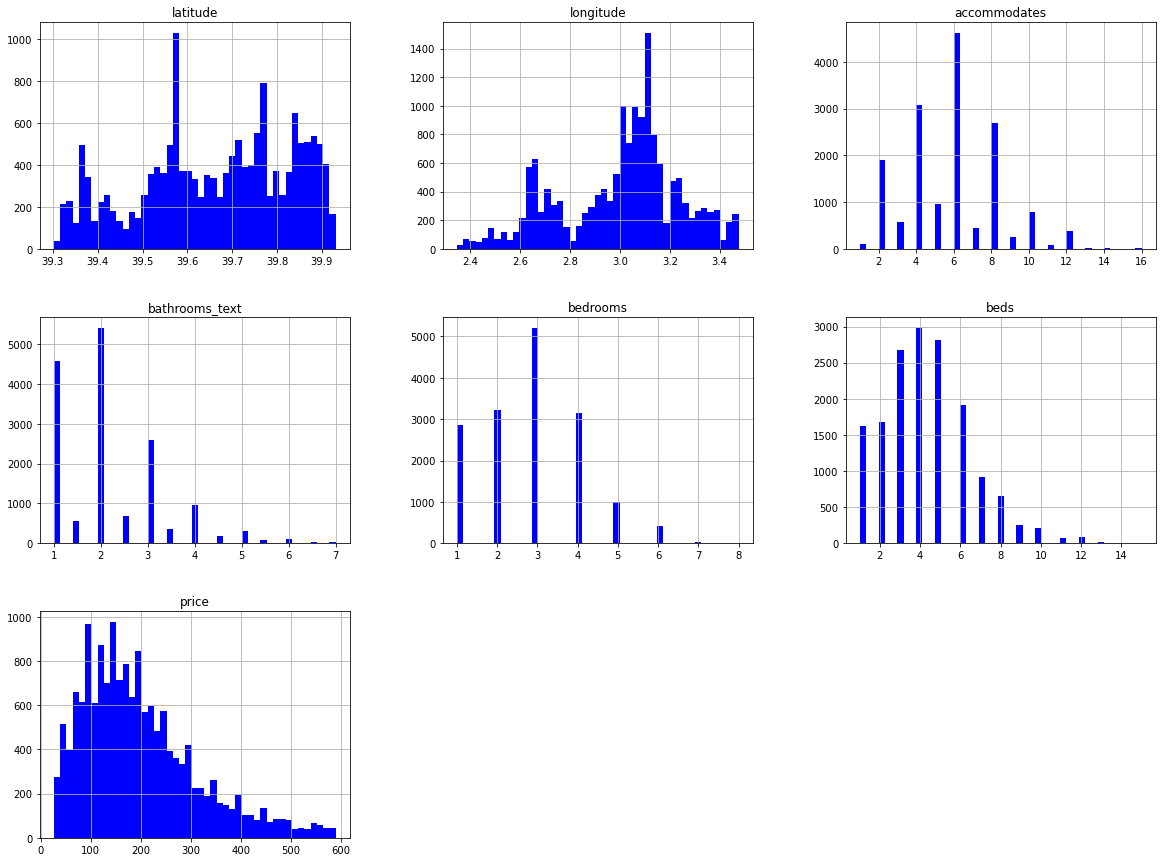

In [17]:
df_statistics.hist(bins=45, figsize=(20,15),color='b')

## <span style="font-size:20px;font-weight:bold"> 2.2. Correlación entre variables numéricas</span>

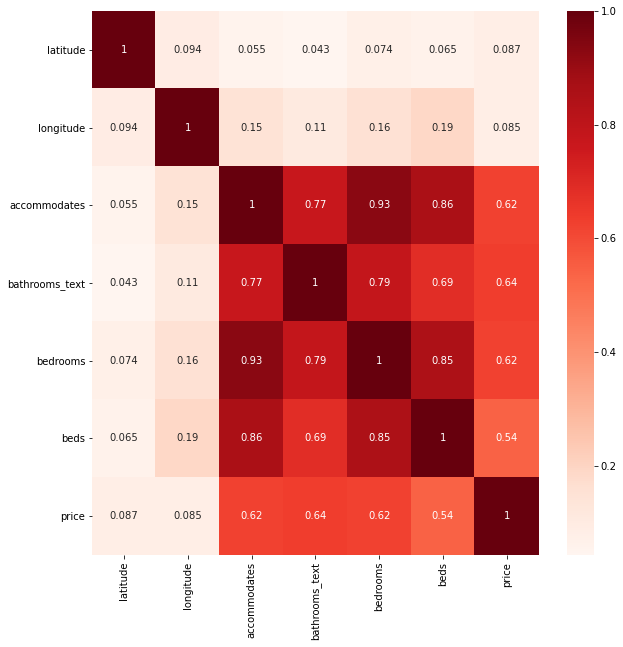

In [18]:
plt.figure(figsize=(10,10))
cor_matrix = df_statistics.corr()
sns.heatmap(cor_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

La correlación es una medida asociada a la linealidad que hay entre dos variables. De esta forma tenemos que si la linealidad se acerca a 0, es que esas 2 variables no están correlacionados. Por otro lado, si la variable se acerca a 1, quiere decir que esas 2 variables están correlacionadas. En cambio, si la variable de correlación se acerca a -1, quiere decir que son anticorrelacionadas.

Vemos en la matriz de correlaciones como, evidentemente, hay una fuerte correlación entre variables que tienen mucha relación que son el número de habitaciones, con el número de camas y con el número de personas que se pueden alojar.

Por otro lado, 2 variables que no están correlacionadas serían *longitude* y *latitude* debido a la geolocalización de Mallorca.

Ahora veremos unas graficas que muestran las relaciones entre las variables para poder sacar alguna conclusión de su resultado.

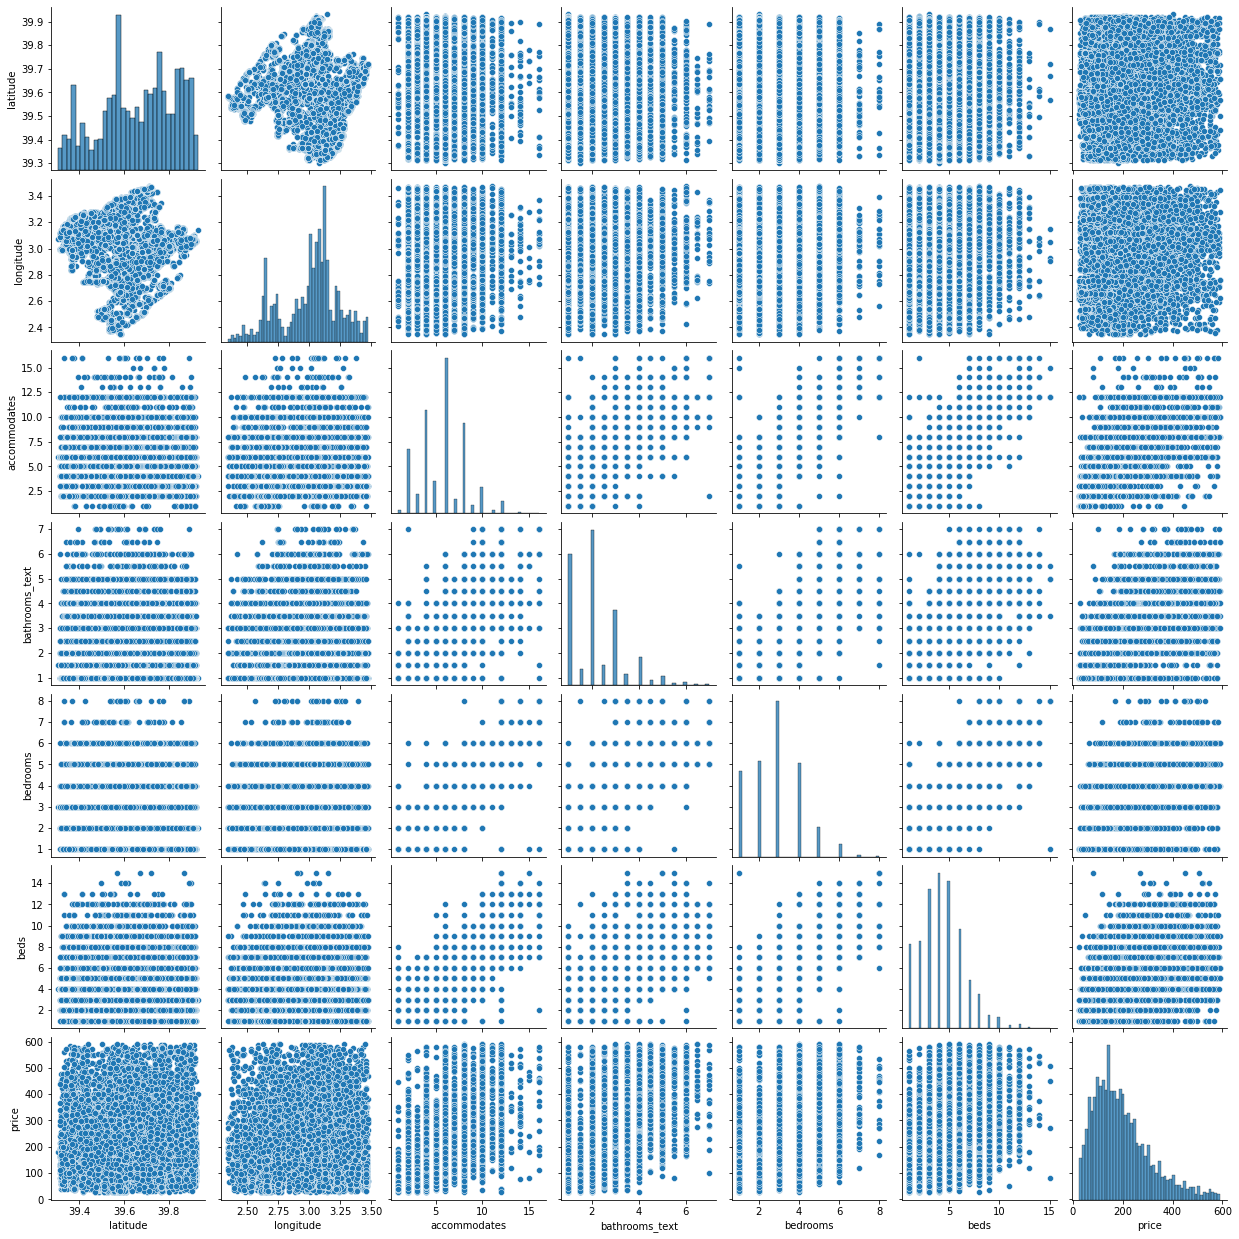

In [19]:
## Create the pairplot using seaborn

sns.pairplot(data=df_statistics)

En estas gráficas podemos ver la distribución de los datos según cada par de variables. Ninguno tiene una forma lineal y por eso se necesitará un modelo que pueda capturar las características no lineales.  Como conclusión a estos datos podemos ver que tendrá que ser un problema de regresión y no de clasificación. Se pretende que el modelo a utilizar tenga bajo bies y alta varianza, de este modo, se utilizará el modelo de *Random Forest Regressor* que es una combinación de varios *decission tree*, para así capturar la no linealidad en los datos.

## <span style="font-size:20px;font-weight:bold"> 2.3. Distribución geográfica del precio del alojamiento</span>

Un aspecto importante a la hora de predecir el precio de un alojamiento podría ser la distribución geográfica. Mediante las variables *latitude* y *longitude* se puede geolocalizar el precio de ese alojamiento.

A continuación se muestra un gráfico de la geolocalización del alojamiento con un color, dependiendo del valor del precio de ese alojamiento.

<ipython-input-20-e7e456b81887>:7: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  plt.colorbar(cmap=plt.get_cmap("jet"))


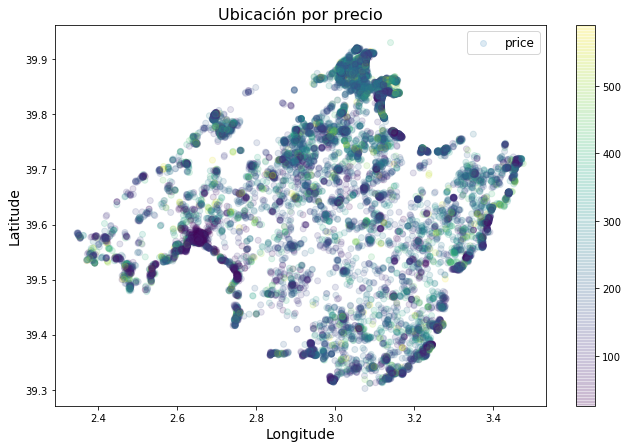

In [20]:
plt.figure(figsize=[11,7])
plt.scatter(df.longitude,df.latitude,c=df.price,alpha=0.15,label='price')
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
plt.title('Ubicación por precio',fontsize=16)
plt.legend(fontsize=12)
plt.colorbar(cmap=plt.get_cmap("jet"))

Se puede ver claramente como la geolocalización de todos los alojamientos formar perfectamente la isla de Mallorca. En principio tambien es un mapa de calor según el precio pero al existir unos pocos valores muy altos, hacen que la mayoría de alojamientos queden sobre el 10% del rango inferior de precios.

## <span style="font-size:20px;font-weight:bold"> 2.4. Características numéricas</span>

Hay 2 características numéricas que presentaban valores nulos: *bedrooms* y *beds*. Ahora veremos exactamente la cantidad de filas con nulos que tiene cada una.

In [21]:
# Recuento de valores nulos a bedrooms
count_nan = len(df['bedrooms']) - df['bedrooms'].count()
print("Valores nulos a 'bedrooms' = " + str(count_nan))

Valores nulos a 'bedrooms' = 0


In [22]:
# Recuento de valores nulos a beds
count_nan = len(df['beds']) - df['beds'].count()
print("Valores nulos a 'beds' = " + str(count_nan))

Valores nulos a 'beds' = 0


Podemos observar como ninguna de estas 2 características ya no tienen nulos. Eso es debido al tratamiento de *outliers* que ha producido una eliminación de las filas que tenían nulos tanto en *bedrooms* como en *beds*.

## <span style="font-size:20px;font-weight:bold"> 2.5. Características categóricas</span>

Hasta el momento, solo hemos hablado y tratado características numéricas, a excepción de *bathrooms_text* y *price*, aunque estas no eran categóricas. La única característica categórica que se tendrá en cuenta para generar el modelo es *room_type*. Para esta característica se realizará un recuento de los valores que tiene y también se visualizará una frecuencia de sus valores en un diagrama de barras.

Entire home/apt    14423
Private room        1280
Hotel room           197
Shared room           14
Name: room_type, dtype: int64


<AxesSubplot:>

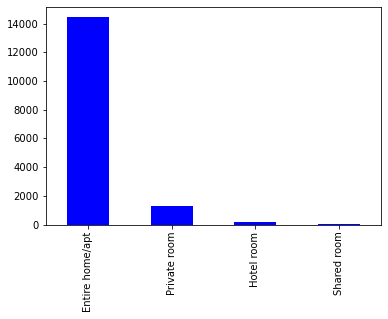

In [23]:
categoria_count = df['room_type'].value_counts()
print(categoria_count)
categoria_count.plot.bar(color='b')

Podemos observar como hay 4 opciones para la categoría de *room_type* y que la mayoritaria es *Entire home/apt*, la cual quiere decir que la mayoría de los alojamientos que se ofertan en Mallorca, suele ofrecerse la casa, piso o apartamento completo.

Ahora veremos el porcentaje que corresponde a cada categoría de la característica *room_type* y su distribución en un gráfico circular.

In [24]:
categoria_porcentaje = (df['room_type'].value_counts()/df['room_type'].count())*100
categoria_porcentaje

Entire home/apt    90.630891
Private room        8.043232
Hotel room          1.237904
Shared room         0.087973
Name: room_type, dtype: float64

<AxesSubplot:ylabel='room_type'>

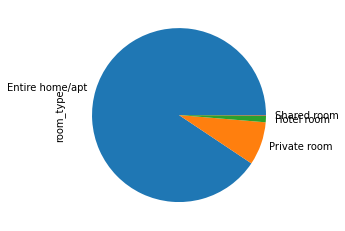

In [25]:
categoria_porcentaje.plot.pie()

Más del 90% son de casas, pisos o apartamentos donde se oferta toda la vivienda. En cambio, hay un 8% donde solo se ofrece una habitación privada, 1.2% para habitaciones de hotel y un bajísimo 0.08% para una habitación compartida.

A continuación veremos unos valores estadísticos relacionados con las características numéricas y agrupando por el tipo de característica categórica. Permitirán tener información del comportamiento de los datos dependiendo del tipo de *room_type*. Podremos ver el total de filas, la media aritmética, la desviación estándar, el valor mínimo, máximo y percentiles según el *room_type*.

In [26]:
df_features1 = pd.DataFrame(df, columns=['room_type','latitude','longitude'])
df_features2 = pd.DataFrame(df, columns=['room_type','accommodates','bathrooms_text'])
df_features3 = pd.DataFrame(df, columns=['room_type','bedrooms','beds'])
df_features4 = pd.DataFrame(df, columns=['room_type','price'])
df_statistics_by_room_type1 = df_features1.groupby('room_type').describe()
df_statistics_by_room_type2 = df_features2.groupby('room_type').describe()
df_statistics_by_room_type3 = df_features3.groupby('room_type').describe()
df_statistics_by_room_type4 = df_features4.groupby('room_type').describe()
df_statistics_by_room_type1

latitude                                                       \
                   count       mean       std       min        25%        50%   
room_type                                                                       
Entire home/apt  14423.0  39.666122  0.170090  39.30197  39.546545  39.694720   
Hotel room         197.0  39.616579  0.144031  39.32924  39.528850  39.607900   
Private room      1280.0  39.605790  0.116859  39.31681  39.552475  39.579420   
Shared room         14.0  39.618925  0.079861  39.50235  39.574353  39.576915   

                                     longitude                               \
                       75%       max     count      mean       std      min   
room_type                                                                     
Entire home/apt  39.817405  39.93065   14423.0  3.020333  0.231672  2.34650   
Hotel room       39.718080  39.90432     197.0  2.931019  0.272472  2.44503   
Private room     39.679887  39.91036    1280.0  2.830937  0.242044  2.35173   
Shared room      39.659740  39.79362      14.0  2.725541  0.181959  2.59496   

                                                        
                      25%       50%       75%      max  
room_type                                               
Entire home/apt  2.903870  3.059520  3.150225  3.47552  
Hotel room       2.689040  2.913930  3.123420  3.43936  
Private room     2.650412  2.726935  3.023225  3.46102  
Shared room      2.623030  2.639890  2.726272  3.12485

In [27]:
df_statistics_by_room_type2

accommodates                                                \
                       count      mean       std  min  25%  50%  75%   max   
room_type                                                                    
Entire home/apt      14423.0  6.086667  2.307514  1.0  4.0  6.0  8.0  16.0   
Hotel room             197.0  2.873096  1.554827  2.0  2.0  2.0  4.0  16.0   
Private room          1280.0  2.429688  1.364028  1.0  2.0  2.0  2.0  16.0   
Shared room             14.0  3.357143  2.762584  1.0  2.0  2.5  3.0  12.0   

                bathrooms_text                                               
                         count      mean       std  min  25%  50%  75%  max  
room_type                                                                    
Entire home/apt        14423.0  2.287978  1.100221  1.0  1.5  2.0  3.0  7.0  
Hotel room               197.0  1.071066  0.252589  1.0  1.0  1.0  1.0  2.5  
Private room            1280.0  1.201563  0.528690  1.0  1.0  1.0  1.0  7.0  
Shared room               14.0  1.214286  0.468807  1.0  1.0  1.0  1.0  2.5

In [28]:
df_statistics_by_room_type3

bedrooms                                               \
                   count      mean       std  min  25%  50%  75%  max   
room_type                                                               
Entire home/apt  14423.0  3.029883  1.210140  1.0  2.0  3.0  4.0  8.0   
Hotel room         197.0  1.157360  0.417242  1.0  1.0  1.0  1.0  3.0   
Private room      1280.0  1.158594  0.576315  1.0  1.0  1.0  1.0  8.0   
Shared room         14.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0   

                    beds                                                 
                   count      mean       std  min   25%  50%  75%   max  
room_type                                                                
Entire home/apt  14423.0  4.592387  2.097218  1.0  3.00  4.0  6.0  15.0  
Hotel room         197.0  1.685279  0.927162  1.0  1.00  1.0  2.0   6.0  
Private room      1280.0  1.718750  1.284645  1.0  1.00  1.0  2.0  15.0  
Shared room         14.0  2.785714  2.044827  1.0  1.25  2.0  3.0   8.0

In [29]:
df_statistics_by_room_type4

price                                              \
                   count        mean         std   min    25%    50%   
room_type                                                              
Entire home/apt  14423.0  207.702624  112.851963  26.0  125.0  183.0   
Hotel room         197.0  181.345178   95.202537  40.0  108.0  172.0   
Private room      1280.0   92.670828   88.747758  26.0   40.0   60.0   
Shared room         14.0   96.132857   82.788188  26.0   50.0   70.0   

                                  
                      75%    max  
room_type                         
Entire home/apt  265.0000  590.0  
Hotel room       228.0000  530.0  
Private room     105.1775  580.0  
Shared room      107.7500  311.0

Podemos observar como la mayoría de las filas son del tipo de *room_type* de *Entire home/apt*. 

Cabe nombrar que los alojamientos de tipo *room_type* de *Shared room*, tienen solo 1 habitación que concuerda con su tipo de habitación que sería habitación compartida y por eso es solo una.

Por último, relacionado con *price* la media del precio por noche es un poco mayor en *Entire home/apt*. Los *Private room* y *Shared room* parecen más económicos, ya que la media del precio es inferior a la mitad de *Hotel room* y *Entire home/apt*.

## <span style="font-size:20px;font-weight:bold"> 2.6. Tipo de problema y modelo</span>

Tras un análisis de los datos, teniendo en cuenta el problema que se quiere resolver y la variable dependiente *price*, nos encontramos ante un problema de regresión, ya que pretende predecir el valor de un alojamiento dentro de un cojunto de valores continuos.

El modelo que se utilizará para obtener una solución será *Random Forest Regressor* a fin de conseguir un buen resultado para este problema.

# <span style="font-size:26px;font-weight:bold"> 3. Tratamiento de los datos</span>

Una vez realizado el estudio y  el análisis de los datos, entendidas sus características y cuales serán utilizadas, se realizará un tratamiento de las características antes de aplicar el algoritmo de aprendizaje automático. Se realizará una transformación de los datos, ya sean características numéricas o categóricas.

Todas las transformaciones se ejecutarán sobre el subset de entrenamiento. De esta forma, la media para imputación se calculará solo sobre el subset de entrenamiento y la usaremos para popular los nulos en el dataset de testeo. Esto se hace así para poder simular las condiciones de uso reales, donde las predicciones siempre serán "out of sample".

Se van a utilizar *pipelines*, uno para las características numéricas y otro para la característica categórica. Finalmente se unirán en un solo *pipeline*.

In [30]:
# Se monta un dataframe con todas las características a usar en el problema
df_statistics_total = pd.DataFrame(df_statistics, columns=df_statistics.columns)
df_statistics_total['room_type'] = df['room_type']

In [31]:
df_statistics_total

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,price,room_type
0,39.51888,2.48182,2,1.0,1.0,1.0,89.0,Entire home/apt
1,39.76347,3.16255,8,3.0,4.0,7.0,175.0,Entire home/apt
2,39.66044,3.07165,6,2.0,3.0,4.0,140.0,Entire home/apt
3,39.61600,3.30121,4,1.0,2.0,4.0,200.0,Entire home/apt
4,39.56478,2.60333,2,1.0,1.0,2.0,110.0,Private room
...,...,...,...,...,...,...,...,...
17603,39.76505,3.12689,6,3.5,3.0,4.0,195.0,Entire home/apt
17604,39.89835,3.03647,9,3.0,5.0,8.0,110.0,Entire home/apt
17605,39.75437,2.90504,6,2.0,3.0,4.0,179.0,Entire home/apt
17606,39.54550,2.39348,2,1.0,1.0,1.0,42.0,Private room


Dividimos los datos en test y train, dejando un 33% de los datos para test.

In [32]:
## Dividimos los datos en test y train
X_train, X_test, y_train, y_test = train_test_split(df_statistics_total.drop('price', axis=1), df['price'], test_size = 0.33, random_state=1234)

In [33]:
X_train

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,room_type
15312,39.57750,2.41881,3,1.0,3.0,3.0,Entire home/apt
12743,39.60612,3.38871,4,1.0,2.0,3.0,Entire home/apt
7708,39.56867,2.64897,4,1.0,1.0,2.0,Entire home/apt
2801,39.55649,3.22608,9,3.0,5.0,6.0,Entire home/apt
5877,39.56817,2.65175,2,1.0,1.0,1.0,Entire home/apt
...,...,...,...,...,...,...,...
12627,39.70775,3.46023,4,1.0,2.0,3.0,Entire home/apt
7948,39.79385,2.69885,6,3.0,3.0,5.0,Entire home/apt
1473,39.56909,2.64514,3,1.0,2.0,2.0,Entire home/apt
9814,39.57564,2.65042,3,1.0,1.0,2.0,Private room


Utilizaremos una serie de funciones auxiliares para el tratamiento de los datos.

In [34]:
from sklearn.base import TransformerMixin

### Funciones auxiliares

class SelectColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Especifica las columnas en una lista')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.columns]
    
class DropColumns(TransformerMixin):
    def __init__(self, columns: list) -> pd.DataFrame:
        if not isinstance(columns, list):
            raise ValueError('Especifica las columnas en una lista')
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(self.columns, axis=1)

## <span style="font-size:20px;font-weight:bold"> 3.1. Características numéricas</span>

En esta sección se quitarán los valores nulos y se realizará una normalización de los datos. En el momento que se pretenden tatar los valores nulos, normalmente aparecen 3 opciones:

<ul>
<li>Eliminar esa característica del conjunto de datos.</li>
<li>Eliminar los valores nulos del conjunto de datos eliminando toda la fila que contiene ese valor nulo.</li>
<li>Sustituir los valores nulos por otro valor como por ejemplo la media aritmética.</li>
</ul>
    
Como se ha visto anteriormente, de las características que vamos a utilizar que son *latitude*, *longitude*, *room_type*, *accommodates*, *bathrooms_text*, *bedrooms*, *beds* y *price*, aunque ninguna tiene valores nulos aún así se pasará una función para que revise los valores nulos. También se realizará una normalización de los datos a fin de que todos estén balanceados. Por último se usará PCA para eliminar colinealidad.

In [35]:
drop_column_step = ('drop_column', DropColumns(['room_type']))

imputation_step = ('imputer', SimpleImputer())

scaler_step = ('scaler', MinMaxScaler())

pca_step = ('pca', PCA())

num_pipe_steps = [drop_column_step, imputation_step, scaler_step, pca_step]

num_pipe = Pipeline(num_pipe_steps)

In [36]:
df_num_pipe = pd.DataFrame(num_pipe.fit_transform(X_train))
df_num_pipe

,0,1,2,3,4,5
0,-0.339348,0.130453,0.446780,0.114467,-0.047414,-0.153385
1,-0.206492,-0.004355,-0.391561,0.053202,-0.018486,-0.005706
2,-0.453581,0.094528,0.223024,0.025200,0.011737,0.085513
3,0.387255,0.233307,-0.145161,0.049997,-0.110988,-0.035178
4,-0.546803,0.073899,0.206770,-0.037617,-0.000810,-0.011455
...,...,...,...,...,...,...
10657,-0.161260,-0.171903,-0.431010,0.048311,-0.019307,-0.003862
10658,0.095634,-0.160355,0.316263,-0.072500,0.052907,-0.002751
10659,-0.409538,0.102653,0.233945,0.041455,-0.037342,-0.056143
10660,-0.482474,0.075969,0.217685,0.008948,0.033536,0.034237


Vemos como los datos ya no tienen nulos y están entre 0 y 1.

## <span style="font-size:20px;font-weight:bold"> 3.2. Características categóricas</span>

En esta sección se transformará la característica categórica en numérica a fin de que el modelo pueda tratarla. Esta transformación será encapsulada en un *pipeline* que será unido al *pipeline* creado anteriormente con las características numéricas.

Se selecciona la columna en concreto a transformar y se le hace un *OneHotEncoder*. Posteriormente se crea el *pipeline*.

In [37]:
#One hot encoding con room_type
select_col_step = ('select', SelectColumns(['room_type']))
one_hot_step = ('room_type', OneHotEncoder(sparse=False))
cat_pipe_steps = [select_col_step, one_hot_step]
cat_pipe = Pipeline(cat_pipe_steps)

Comprobamos que realiza correctamente la transformación de los datos de entrenamiento.

In [38]:
cat_pipe.fit_transform(X_train)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

Y comprobamos que tenga todavía las categorías.

In [39]:
cat_pipe['room_type'].categories_

[array(['Entire home/apt', 'Hotel room', 'Private room', 'Shared room'],
       dtype=object)]

Ahora juntamos los 2 *pipelines*.

In [40]:
transformer_list = [('num_pipe', num_pipe),
                    ('cat_pipe', cat_pipe)]

data_prep_pipe = FeatureUnion(transformer_list=transformer_list)
data_prep_step = ('data_prep', data_prep_pipe)

Comprobamos que funciona correctamente el *pipeline* realizando la transformación de los datos de entrenamiento y viendo su resultado.

In [41]:
df_data_prep_pipe = pd.DataFrame(data_prep_pipe.fit_transform(X_train))
df_data_prep_pipe

,0,1,2,3,4,5,6,7,8,9
0,-0.339348,0.130453,0.446780,0.114467,-0.047414,-0.153385,1.0,0.0,0.0,0.0
1,-0.206492,-0.004355,-0.391561,0.053202,-0.018486,-0.005706,1.0,0.0,0.0,0.0
2,-0.453581,0.094528,0.223024,0.025200,0.011737,0.085513,1.0,0.0,0.0,0.0
3,0.387255,0.233307,-0.145161,0.049997,-0.110988,-0.035178,1.0,0.0,0.0,0.0
4,-0.546803,0.073899,0.206770,-0.037617,-0.000810,-0.011455,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
10657,-0.161260,-0.171903,-0.431010,0.048311,-0.019307,-0.003862,1.0,0.0,0.0,0.0
10658,0.095634,-0.160355,0.316263,-0.072500,0.052907,-0.002751,1.0,0.0,0.0,0.0
10659,-0.409538,0.102653,0.233945,0.041455,-0.037342,-0.056143,1.0,0.0,0.0,0.0
10660,-0.482474,0.075969,0.217685,0.008948,0.033536,0.034237,0.0,0.0,1.0,0.0


# <span style="font-size:26px;font-weight:bold"> 4. Modelo</span>

En esta sección se hará uso del algoritmo ***Random Forest Regressor*** para crear un modelo que pueda predecir el valor del precio de un alojamiento.

Primero creamos un *pipeline* del modelo y se compone un pipeline final con el modelo y el *pipeline* de la preparación de los datos anterior.

In [42]:
## Modelling step
regressor_step = ('model', RandomForestRegressor())

### Compose full pipe: RandomForest over data_prep_pipe
pipe_steps = [data_prep_step, regressor_step]
pipe = Pipeline(pipe_steps)

In [43]:
## Visualizamos los datos de entrenamiento sin transformar
X_train

,latitude,longitude,accommodates,bathrooms_text,bedrooms,beds,room_type
15312,39.57750,2.41881,3,1.0,3.0,3.0,Entire home/apt
12743,39.60612,3.38871,4,1.0,2.0,3.0,Entire home/apt
7708,39.56867,2.64897,4,1.0,1.0,2.0,Entire home/apt
2801,39.55649,3.22608,9,3.0,5.0,6.0,Entire home/apt
5877,39.56817,2.65175,2,1.0,1.0,1.0,Entire home/apt
...,...,...,...,...,...,...,...
12627,39.70775,3.46023,4,1.0,2.0,3.0,Entire home/apt
7948,39.79385,2.69885,6,3.0,3.0,5.0,Entire home/apt
1473,39.56909,2.64514,3,1.0,2.0,2.0,Entire home/apt
9814,39.57564,2.65042,3,1.0,1.0,2.0,Private room


In [44]:
# Entrenamos todo el pipeline con los datos de entrenamiento
pipe.fit(X_train, y_train)

Pipeline(steps=[('data_prep',
                 FeatureUnion(transformer_list=[('num_pipe',
                                                 Pipeline(steps=[('drop_column',
                                                                  <__main__.DropColumns object at 0x00000235B98AA910>),
                                                                 ('imputer',
                                                                  SimpleImputer()),
                                                                 ('scaler',
                                                                  MinMaxScaler()),
                                                                 ('pca',
                                                                  PCA())])),
                                                ('cat_pipe',
                                                 Pipeline(steps=[('select',
                                                                  <__main__.SelectColumns object at 0

In [45]:
# Predicción de los datos brutos usando el pipeline
y_predict = pipe.predict(X_test)

Visualizamos las comparación entre los datos de resultado de test y las predicciones.

Text(0, 0.5, 'Valor predecido')

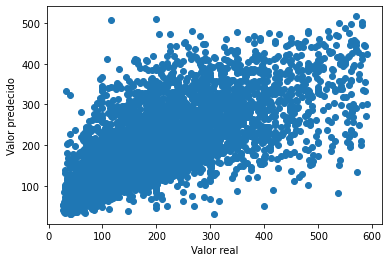

In [46]:
f, ax = plt.subplots()

ax.scatter(y_test, y_predict)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predecido')

Ahora veremos los valores de las métricas de evaluación del modelo para comprobar su comportamiento. Se buscará el MAE, MSE, RMSE, MAPE y accuracy en función del MAPE.

In [47]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_predict))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error (RMSE):',mean_squared_error(y_test, y_predict, squared=False))
mape = np.mean(np.abs((y_test - y_predict) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 60.547962503173395
Mean Squared Error (MSE): 7186.840520272027
Root Mean Squared Error (RMSE): 84.77523530059959
Mean Absolute Percentage Error (MAPE): 37.16
Accuracy: 62.84


El valor más característico de un modelo de regressión suele ser el **MAE** y en este caso es alrededor de 60. También en función del MAPE hay un *accuracy* de 62.84%.

Ahora, con un poco de tiempo, se hará una búsqueda utilizando **GridSearchCV** para tratar de obtener los mejores parámetros del modelo a fin de mejorar el resultado obtenido. Esta herramienta evalúa el modelo con cada una de las combinaciones de hiper-parametros utilizando la técnica de *cross validation*.

In [48]:
## Definimos el espacio de busqueda para el gridsearch.
## Podemos acceder a los distintos hiperparametros de los Transformadores como nombre__hiperparametro

# Number of trees in random forest
n_estimators = [100, 300, 500]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [80, 90, 100]
# Minimum number of samples required to split a node
min_samples_split = [6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3, 5, 7]
# Method of selecting samples for training each tree
bootstrap = [True]# Create the random grid

parameters = {'data_prep__num_pipe__imputer__strategy': ['mean', 'median'],
              'model__n_estimators': n_estimators,
              'model__max_features': max_features,
              'model__max_depth': max_depth,
              'model__min_samples_split': min_samples_split,
              'model__min_samples_leaf': min_samples_leaf,
              'model__bootstrap': bootstrap}

## Define kfold
kfold = KFold(n_splits=3, shuffle=True, random_state=1234)


grid = GridSearchCV(pipe, parameters, n_jobs= 2, cv = kfold, verbose=1)
grid.fit(X_train, y_train)

print('Best params: ', grid.best_params_)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 10.3min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed: 21.7min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 36.9min
[Parallel(n_jobs=2)]: Done 972 out of 972 | elapsed: 44.9min finished


Best params:  {'data_prep__num_pipe__imputer__strategy': 'median', 'model__bootstrap': True, 'model__max_depth': 100, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 7, 'model__min_samples_split': 10, 'model__n_estimators': 300}


Visualizamos los resultados obtenidos con los mejores parámetros.

In [49]:
df_cv_results = pd.DataFrame(grid.cv_results_)

df_cv_results.loc[grid.best_index_]

mean_fit_time                                                                             2.84947
std_fit_time                                                                            0.0367831
mean_score_time                                                                          0.154594
std_score_time                                                                         0.00162942
param_data_prep__num_pipe__imputer__strategy                                               median
param_model__bootstrap                                                                       True
param_model__max_depth                                                                        100
param_model__max_features                                                                    sqrt
param_model__min_samples_leaf                                                                   7
param_model__min_samples_split                                                                 10
param_model__n_estim

Ahora probamos el resultado del GridSearchCV con los datos de test.

In [50]:
## Predicción usando GridSearchCV
y_predict_grid = grid.predict(X_test)

Visualizamos las comparación entre los datos de resultado de test y las predicciones.

Text(0, 0.5, 'Valor predecido')

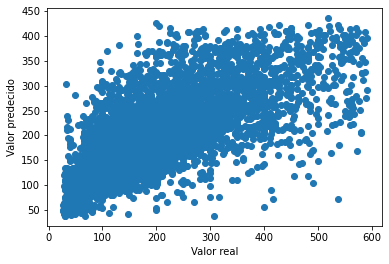

In [51]:
f, ax = plt.subplots()

ax.scatter(y_test, y_predict_grid)
ax.set_xlabel('Valor real')
ax.set_ylabel('Valor predecido')

Ahora veremos los valores de las métricas de evaluación del modelo para comprobar su comportamiento. Se buscará el MAE, MSE, RMSE, MAPE y accuracy en función del MAPE.

In [52]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_predict_grid))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_predict_grid))
print('Root Mean Squared Error (RMSE):', mean_squared_error(y_test, y_predict_grid, squared=False))
mape = np.mean(np.abs((y_test - y_predict_grid)/y_test))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 60.33082519924058
Mean Squared Error (MSE): 6874.663244673397
Root Mean Squared Error (RMSE): 82.91358902299065
Mean Absolute Percentage Error (MAPE): 37.81
Accuracy: 62.19


Podemos observar que con el *GridSearchCV* se ha conseguido mejorar ligeramente las métricas de evaluación como por ejemplo el **MAE** aunque ha aumentado el valor de MAPE consiguiendo una disminución del *accuracy*, aunque prácticamente los valores son casi iguales.

# <span style="font-size:26px;font-weight:bold"> 5. Conclusiones </span>

En esta práctica se ha pretendido predecir el precio de un nuevo alojamiento en Mallorca para la plataforma de AirBnB en base a su características como alojamiento. Para la predición del precio del alojamiento serán necesarias las siguientes características:

<ul>
<li>Las coordenadas de geolocalización.</li>
<li>Número de personas que puede acomodar el alojamiento.</li>
<li>Número de baños.</li>
<li>Número de habitaciones.</li>
<li>Número de camas.</li>
<li>Tipo de alojamiento: Entire home/apt, Hotel room, Private room o Shared room.</li>
</ul>

Para obtener la solución, se han aplicado diferentes técnicas vistas en clase. Se han analizados las características del problema, escogido las características que mejor representaban una solución, se han tratado los datos mediante:

<ul>
<li>Visualización de todas las características y selección de características.</li>
<li>Estadísticas y gráficos para las características seleccionadas.</li>
<li>Modificación de características a tipo numérico.</li>
<li>Detección de outliers y colinealidad.</li>
<li>Normalización de los datos.</li>
<li>Tratamiento de nulos.</li>
</ul>

Debido a la naturaleza del problema y a sus datos, no tenía sentido realizar un modelo de clasificación. Por eso el modelo que se ha decidido utilizar en un modelo de regresión, concretamente *Random Forest Regression*. Para la solución del problema se han utilizado *pipelines* a fin de encapsular las funciones para tener un proyecto limpio y estructurado. Sobre la ejecución del modelo, se ha ejecutado el modelo base mediante un *pipeline* de todos los pasos para obtener un resultado con los datos por defecto. Posteriormente se ha utilizado el *pipeline* con una función *GridSearchCV* de entrenamiento del modelo que usa *cross-validation* como validación del entrenamiento donde realiza distintas combinaciones del modelo según unos parámetros previos. Luego se han obtenido los resultados de las métricas, consiguiendo con *GridSearchCV* una ligera mejoría, dónde habría un error medio absoluto de las predicciones de unos 59.99 aunque bajaría mínimamente el *accuracy*.